
<p style="margin: 5px 0 0 0; color: #666;"><em>Desarrollado con Claude - Anthropic</em></p>

<h1 style="margin: 0;">1. Fundamentos Matemáticos y Estadísticos</h1>


**Construir una base sólida en estadística aplicada para el análisis de datos.**


Este notebook cubre los conceptos fundamentales de matemáticas y estadística que todo analista de datos debe dominar. Desde medidas básicas de tendencia central hasta análisis de regresión, cada concepto incluye explicaciones teóricas, implementaciones prácticas en Python y visualizaciones interactivas.

---

## Introducción

In [1]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Configuración de visualización
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

## Estadística Descriptiva

### ¿Qué es?

La **estadística descriptiva** es el conjunto de técnicas que nos permiten resumir, organizar y presentar datos de una manera comprensible. En lugar de trabajar con miles de números individuales, podemos usar unas pocas estadísticas clave para entender el comportamiento general de nuestros datos.



### ¿Para qué sirve?

- **Medidas de forma** (asimetría, curtosis): Describen la distribución de los datos

- **Medidas de dispersión** (varianza, desviación estándar): Indican qué tan dispersos están los datos

- **Resumir grandes volúmenes de datos** en medidas significativas (media, mediana, etc.)

- **Medidas de tendencia central** (media, mediana, moda): Identifican el "centro" de los datos

- **Visualizaciones** (histogramas, box plots): Representan gráficamente las características de los datos

- **Identificar patrones y tendencias** en los datos

- **Detectar valores atípicos** o anomalías

En el análisis de datos, usamos medidas descriptivas para:

- **Comparar diferentes conjuntos de datos** de manera objetiva

- **Comunicar resultados** de forma clara a stakeholders no técnicos

### ¿Cómo se usa?

En el código siguiente, aplicaremos estas medidas a un conjunto de datos real y visualizaremos los resultados.

In [ ]:
# Crear un conjunto de datos de ejemplo
datos = np.array([23, 45, 34, 56, 67, 78, 89, 34, 56, 45, 67, 78, 89, 90, 23, 45, 56, 67, 78, 89])
print("Datos:", datos)

# Media (promedio)
media = np.mean(datos)
print(f"Media: {media:.2f}")

# Mediana (valor central)
mediana = np.median(datos)
print(f"Mediana: {mediana:.2f}")

# Moda (valor más frecuente)
moda = stats.mode(datos, keepdims=True)
print(f"Moda: {moda.mode[0]}")

# Varianza (dispersión respecto a la media)
varianza = np.var(datos, ddof=1)  # ddof=1 para varianza muestral
print(f"Varianza: {varianza:.2f}")

# Desviación estándar (raíz cuadrada de la varianza)
desv_estandar = np.std(datos, ddof=1)
print(f"Desviación Estándar: {desv_estandar:.2f}")

Datos: [23 45 34 56 67 78 89 34 56 45 67 78 89 90 23 45 56 67 78 89]
Media: 60.45
Mediana: 61.50
Moda: 45
Varianza: 492.16
Desviación Estándar: 22.18


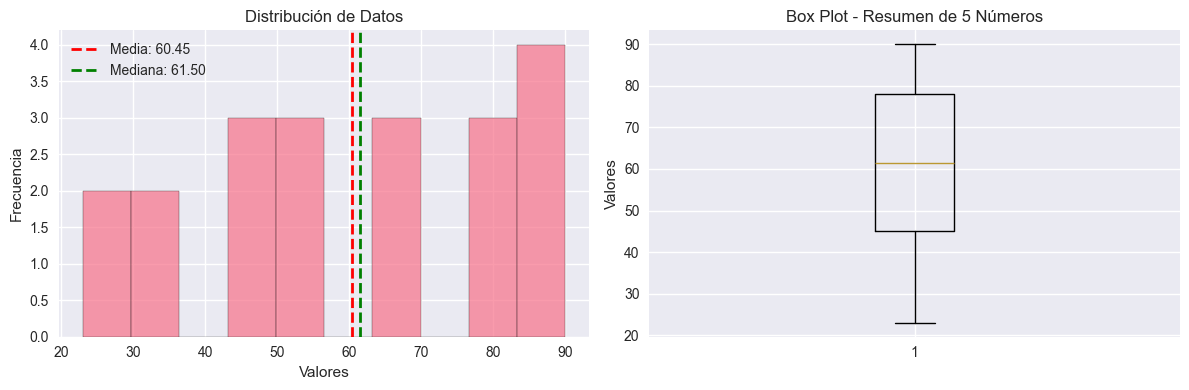


Resumen de 5 números:
Mínimo: 23
Q1 (25%): 45.0
Mediana (50%): 61.5
Q3 (75%): 78.0
Máximo: 90


In [4]:
# Visualización de estadísticas descriptivas
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Histograma
axes[0].hist(datos, bins=10, edgecolor='black', alpha=0.7)
axes[0].axvline(media, color='red', linestyle='--', linewidth=2, label=f'Media: {media:.2f}')
axes[0].axvline(mediana, color='green', linestyle='--', linewidth=2, label=f'Mediana: {mediana:.2f}')
axes[0].set_xlabel('Valores')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Distribución de Datos')
axes[0].legend()

# Box plot
axes[1].boxplot(datos)
axes[1].set_ylabel('Valores')
axes[1].set_title('Box Plot - Resumen de 5 Números')

plt.tight_layout()
plt.show()

print(f"\nResumen de 5 números:")
print(f"Mínimo: {np.min(datos)}")
print(f"Q1 (25%): {np.percentile(datos, 25)}")
print(f"Mediana (50%): {mediana}")
print(f"Q3 (75%): {np.percentile(datos, 75)}")
print(f"Máximo: {np.max(datos)}")

## Probabilidad Básica

### ¿Qué es?

La **probabilidad** es la rama de las matemáticas que estudia la incertidumbre y mide numéricamente la posibilidad de que ocurra un evento. Se expresa como un número entre 0 (imposible) y 1 (seguro), o como un porcentaje entre 0% y 100%.



### ¿Para qué sirve?

- **Estimar probabilidades de eventos futuros**: basándose en datos pasados

- **Simular escenarios**: usando generadores de números aleatorios

- **Aplicar reglas de probabilidad**: independencia, probabilidad condicional, teorema de Bayes

La probabilidad es fundamental en análisis de datos para:

- **Calcular probabilidades empíricas**: observando frecuencias en datos históricos

- **Cuantificar la incertidumbre** en las predicciones y estimacionesEn análisis de datos aplicamos conceptos de probabilidad para:

- **Tomar decisiones informadas** bajo condiciones de incertidumbre

- **Modelar eventos aleatorios** como clics en un sitio web, arrivals de clientes, etc.

### ¿Cómo se usa?

- **Evaluar riesgos** en diferentes escenarios de negocio
- **Diseñar experimentos** (A/B testing, muestreo, etc.)

En este ejemplo, simularemos lanzamientos de dados para ilustrar cómo las probabilidades teóricas convergen con las frecuencias observadas cuando aumenta el número de observaciones (Ley de los Grandes Números).

Probabilidad de obtener 1: 0.181 (Teórica: 0.167)
Probabilidad de obtener 2: 0.164 (Teórica: 0.167)
Probabilidad de obtener 3: 0.154 (Teórica: 0.167)
Probabilidad de obtener 4: 0.174 (Teórica: 0.167)
Probabilidad de obtener 5: 0.172 (Teórica: 0.167)
Probabilidad de obtener 6: 0.155 (Teórica: 0.167)


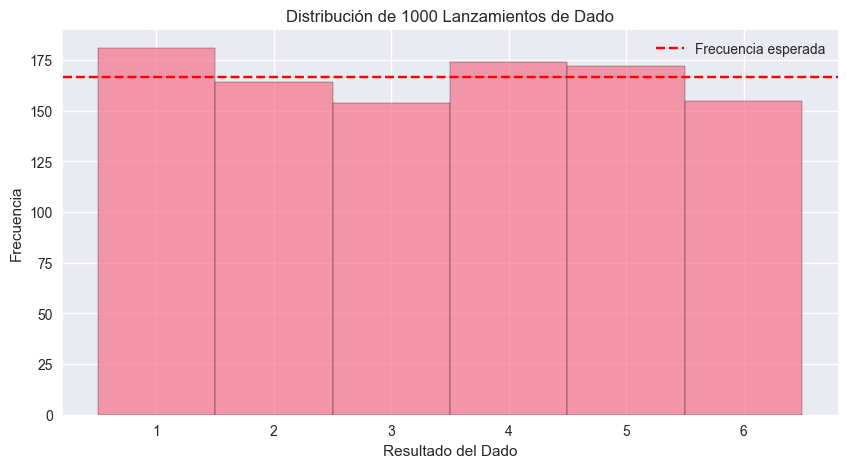

In [5]:
# Simulación de lanzamiento de dados
np.random.seed(42)

# Lanzar un dado 1000 veces
lanzamientos = np.random.randint(1, 7, size=1000)

# Calcular probabilidades empíricas
for i in range(1, 7):
    probabilidad = np.sum(lanzamientos == i) / len(lanzamientos)
    print(f"Probabilidad de obtener {i}: {probabilidad:.3f} (Teórica: 0.167)")

# Visualizar distribución
plt.figure(figsize=(10, 5))
plt.hist(lanzamientos, bins=np.arange(0.5, 7.5, 1), edgecolor='black', alpha=0.7)
plt.xlabel('Resultado del Dado')
plt.ylabel('Frecuencia')
plt.title('Distribución de 1000 Lanzamientos de Dado')
plt.xticks(range(1, 7))
plt.axhline(1000/6, color='red', linestyle='--', label='Frecuencia esperada')
plt.legend()
plt.show()

## Distribuciones Estadísticas

### ¿Qué son?

Una **distribución estadística** es una función que describe la probabilidad de que una variable aleatoria tome diferentes valores. Es como un "modelo" matemático que nos dice qué tan probable es cada resultado posible.

### ¿Para qué sirven?

- **Uniforme**: cuando todos los valores son igualmente probables (números aleatorios)

- **Poisson**: número de eventos en un período (visitas por hora, llamadas por día)

- **Binomial**: número de éxitos en n intentos (conversiones, clics, etc.)

- **Normal (Gaussiana)**: altura de personas, errores de medición, muchas métricas naturales

Las distribuciones son cruciales en análisis de datos porque:

- **Modelan fenómenos del mundo real**: ventas, tiempos de respuesta, clicks, errores, etc.Las distribuciones más comunes en análisis de datos son:

- **Permiten hacer predicciones**: estimar probabilidades de eventos futuros

- **Fundamentan pruebas estadísticas**: tests de hipótesis, intervalos de confianza

### ¿Cómo se usan?

- **Facilitan la simulación**: generar datos sintéticos para testing
- **Ayudan a identificar anomalías**: valores que se desvían del patrón esperado

En el código siguiente, visualizaremos estas cuatro distribuciones clave y sus parámetros característicos. Cada una modela un tipo diferente de proceso aleatorio que encontrarás en análisis de datos.

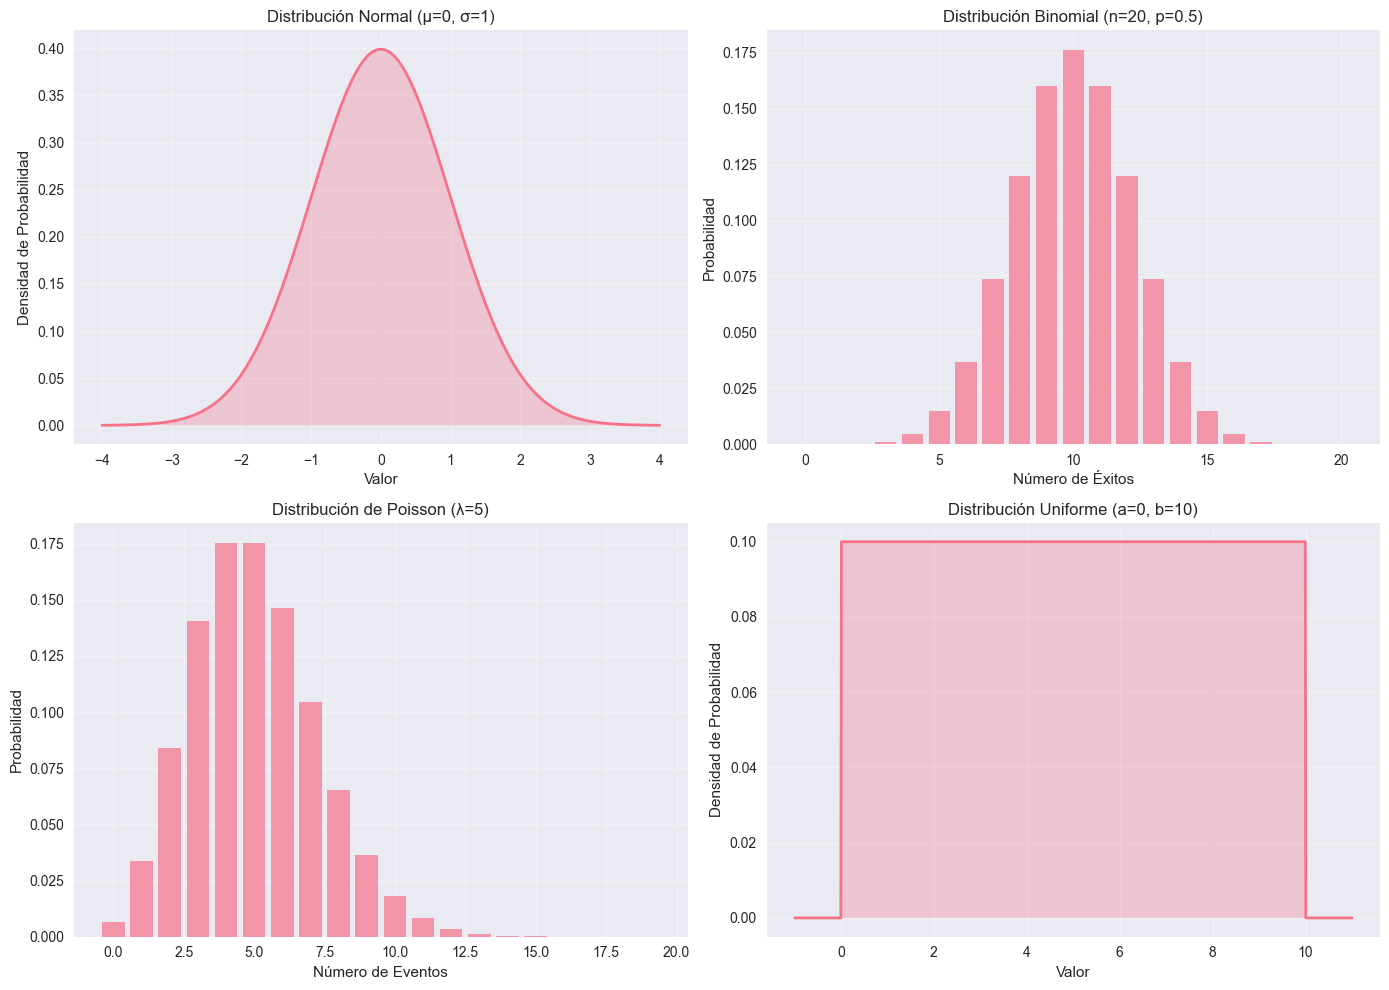

In [6]:
# Distribución Normal
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Distribución Normal
mu, sigma = 0, 1
x = np.linspace(-4, 4, 1000)
normal = stats.norm.pdf(x, mu, sigma)
axes[0, 0].plot(x, normal, linewidth=2)
axes[0, 0].fill_between(x, normal, alpha=0.3)
axes[0, 0].set_title('Distribución Normal (μ=0, σ=1)')
axes[0, 0].set_xlabel('Valor')
axes[0, 0].set_ylabel('Densidad de Probabilidad')
axes[0, 0].grid(True, alpha=0.3)

# 2. Distribución Binomial
n, p = 20, 0.5
x_bin = np.arange(0, n+1)
binomial = stats.binom.pmf(x_bin, n, p)
axes[0, 1].bar(x_bin, binomial, alpha=0.7)
axes[0, 1].set_title('Distribución Binomial (n=20, p=0.5)')
axes[0, 1].set_xlabel('Número de Éxitos')
axes[0, 1].set_ylabel('Probabilidad')
axes[0, 1].grid(True, alpha=0.3)

# 3. Distribución de Poisson
lambda_param = 5
x_pois = np.arange(0, 20)
poisson = stats.poisson.pmf(x_pois, lambda_param)
axes[1, 0].bar(x_pois, poisson, alpha=0.7)
axes[1, 0].set_title('Distribución de Poisson (λ=5)')
axes[1, 0].set_xlabel('Número de Eventos')
axes[1, 0].set_ylabel('Probabilidad')
axes[1, 0].grid(True, alpha=0.3)

# 4. Distribución Uniforme
a, b = 0, 10
x_unif = np.linspace(a-1, b+1, 1000)
uniform = stats.uniform.pdf(x_unif, a, b-a)
axes[1, 1].plot(x_unif, uniform, linewidth=2)
axes[1, 1].fill_between(x_unif, uniform, alpha=0.3)
axes[1, 1].set_title('Distribución Uniforme (a=0, b=10)')
axes[1, 1].set_xlabel('Valor')
axes[1, 1].set_ylabel('Densidad de Probabilidad')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Estadística Inferencial

### ¿Qué es?

La **estadística inferencial** es el conjunto de técnicas que nos permiten hacer conclusiones y predicciones sobre una población completa basándonos únicamente en una muestra de datos. Es el puente entre los datos que tenemos y las conclusiones que queremos hacer.



### ¿Para qué sirve?

- **Nivel de confianza**: típicamente 95%, indica qué tan seguros estamos de nuestra estimación

- **Error estándar**: medida de la variabilidad de nuestras estimaciones

- **Intervalos de confianza**: rangos que probablemente contienen el parámetro poblacional

En análisis de datos, la inferencia estadística es fundamental porque:

- **Estimación puntual**: usar la media de la muestra para estimar la media poblacional

- **Es imposible o costoso medir toda la población**: no podemos encuestar a todos los clientes de una empresaLos conceptos clave de inferencia estadística incluyen:

- **Nos permite hacer estimaciones confiables**: con márgenes de error cuantificables

- **Evalúa la incertidumbre**: mediante intervalos de confianza y valores p

### ¿Cómo se usa?

- **Generaliza resultados**: de una muestra a la población completa
- **Valida decisiones**: con fundamento estadístico sólido

En el siguiente código, generaremos una población completa y una muestra, luego usaremos la muestra para hacer inferencias sobre la población. Esto simula el escenario real donde solo tenemos acceso a una muestra pero queremos conocer parámetros poblacionales.

Media poblacional real: 99.97
Media de la muestra: 99.86
Error estándar: 1.49
Intervalo de confianza 95%: (96.90, 102.82)


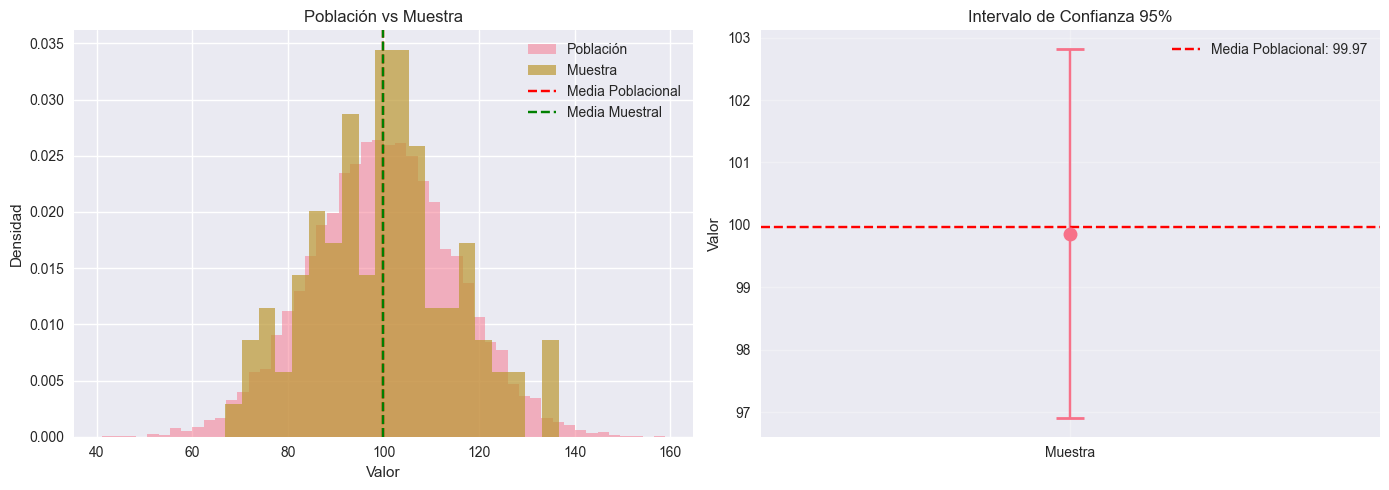

In [7]:
# Generar población y muestra
np.random.seed(42)
poblacion = np.random.normal(100, 15, 10000)
muestra = np.random.choice(poblacion, size=100)

# Estadísticos de la muestra
media_muestra = np.mean(muestra)
error_estandar = stats.sem(muestra)

# Intervalo de confianza del 95%
confianza = 0.95
intervalo = stats.t.interval(confianza, len(muestra)-1, 
                             loc=media_muestra, 
                             scale=error_estandar)

print(f"Media poblacional real: {np.mean(poblacion):.2f}")
print(f"Media de la muestra: {media_muestra:.2f}")
print(f"Error estándar: {error_estandar:.2f}")
print(f"Intervalo de confianza 95%: ({intervalo[0]:.2f}, {intervalo[1]:.2f})")

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(poblacion, bins=50, alpha=0.5, label='Población', density=True)
axes[0].hist(muestra, bins=20, alpha=0.7, label='Muestra', density=True)
axes[0].axvline(np.mean(poblacion), color='red', linestyle='--', label='Media Poblacional')
axes[0].axvline(media_muestra, color='green', linestyle='--', label='Media Muestral')
axes[0].set_xlabel('Valor')
axes[0].set_ylabel('Densidad')
axes[0].set_title('Población vs Muestra')
axes[0].legend()

# Intervalo de confianza
axes[1].errorbar(1, media_muestra, yerr=media_muestra-intervalo[0], 
                fmt='o', markersize=10, capsize=10, capthick=2)
axes[1].axhline(np.mean(poblacion), color='red', linestyle='--', 
               label=f'Media Poblacional: {np.mean(poblacion):.2f}')
axes[1].set_xlim(0.5, 1.5)
axes[1].set_xticks([1])
axes[1].set_xticklabels(['Muestra'])
axes[1].set_ylabel('Valor')
axes[1].set_title('Intervalo de Confianza 95%')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Pruebas de Hipótesis

### ¿Qué son?

Las **pruebas de hipótesis** (hypothesis testing) son procedimientos estadísticos formales para tomar decisiones basadas en evidencia empírica. Nos permiten determinar si una afirmación sobre los datos es probablemente cierta o si podría deberse simplemente al azar.

### ¿Para qué sirven?

- **Tomar decisión**: si p < α, rechazamos H₀

- **Calcular valor p**: probabilidad de observar estos datos si H₀ fuera cierta

- **Calcular estadístico de prueba**: t, z, F, chi-cuadrado, etc.

En análisis de datos y negocios, las pruebas de hipótesis son esenciales para:

- **Establecer nivel de significancia (α)**: típicamente 0.05 (5%)

   - H₁ (hipótesis alternativa): "Sí hay diferencia" o "Sí hay efecto"

- **A/B Testing**: decidir si una versión B es mejor que la versión A   
   - H₀ (hipótesis nula): "No hay diferencia" o "No hay efecto"

- **Comparar grupos**: ¿los clientes nuevos gastan más que los existentes?

- **Definir hipótesis**: 

- **Evaluar cambios**: ¿el nuevo proceso redujo el tiempo de respuesta?

- **Validar afirmaciones**: ¿realmente hay diferencia entre dos productos?El proceso de prueba de hipótesis sigue estos pasos:

- **Minimizar errores de decisión**: cuantificando el riesgo de conclusiones incorrectas

### ¿Cómo se usan?

En el ejemplo siguiente, usaremos el **test t de Student** para comparar dos grupos independientes. Esta es una de las pruebas más comunes en análisis de datos y A/B testing.

PRUEBA T DE STUDENT
H0: Las medias son iguales
H1: Las medias son diferentes

Media Grupo A: 97.75
Media Grupo B: 105.18

Estadístico t: -4.1087
Valor p: 0.0001

Nivel de significancia (α): 0.05

✓ RECHAZAMOS H0: Hay evidencia de diferencia significativa


C:\Users\ingen\AppData\Local\Temp\ipykernel_4504\2199989523.py:41: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([grupo_A, grupo_B], labels=['Grupo A', 'Grupo B'])


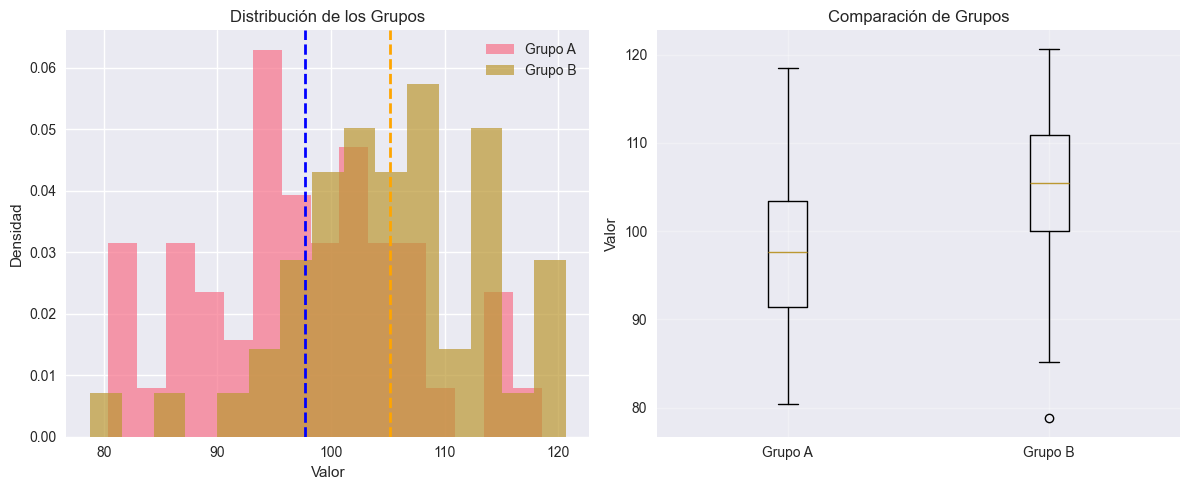

In [8]:
# Ejemplo: Test t de Student para comparar dos grupos
np.random.seed(42)

# Dos grupos de datos
grupo_A = np.random.normal(100, 10, 50)  # Media = 100
grupo_B = np.random.normal(105, 10, 50)  # Media = 105

# Realizar test t
t_stat, p_value = stats.ttest_ind(grupo_A, grupo_B)

print("=" * 50)
print("PRUEBA T DE STUDENT")
print("=" * 50)
print(f"H0: Las medias son iguales")
print(f"H1: Las medias son diferentes")
print(f"\nMedia Grupo A: {np.mean(grupo_A):.2f}")
print(f"Media Grupo B: {np.mean(grupo_B):.2f}")
print(f"\nEstadístico t: {t_stat:.4f}")
print(f"Valor p: {p_value:.4f}")
print(f"\nNivel de significancia (α): 0.05")

if p_value < 0.05:
    print("\n✓ RECHAZAMOS H0: Hay evidencia de diferencia significativa")
else:
    print("\n✗ NO RECHAZAMOS H0: No hay evidencia suficiente de diferencia")

# Visualización
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(grupo_A, bins=15, alpha=0.7, label='Grupo A', density=True)
plt.hist(grupo_B, bins=15, alpha=0.7, label='Grupo B', density=True)
plt.axvline(np.mean(grupo_A), color='blue', linestyle='--', linewidth=2)
plt.axvline(np.mean(grupo_B), color='orange', linestyle='--', linewidth=2)
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.title('Distribución de los Grupos')
plt.legend()

plt.subplot(1, 2, 2)
plt.boxplot([grupo_A, grupo_B], labels=['Grupo A', 'Grupo B'])
plt.ylabel('Valor')
plt.title('Comparación de Grupos')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Regresión Lineal y Correlación

### ¿Qué son?

La **regresión lineal** es una técnica estadística que modela la relación entre una variable dependiente (Y) y una o más variables independientes (X) mediante una ecuación lineal. La **correlación** mide la fuerza y dirección de la relación lineal entre dos variables.

### ¿Para qué sirven?

   - R² = 0.80 significa que el modelo explica el 80% de la variación

Estas técnicas son fundamentales en análisis de datos para:

- **R² (coeficiente de determinación)**: % de variabilidad de Y explicada por X

- **Análisis de residuos**: verificar que los supuestos del modelo se cumplen

- **Predecir valores**: estimar ventas futuras basándose en publicidad invertida   - |r| cercano a 1: relación fuerte

- **Entender relaciones**: ¿cómo afecta el precio a la demanda?   - r < 0: relación negativa (X sube → Y baja)

- **Cuantificar impacto**: por cada $1 en marketing, ¿cuánto aumentan las ventas?   

   - r > 0: relación positiva (X sube → Y sube)

- **Identificar variables importantes**: qué factores realmente importan

- **Coeficiente de correlación (r)**: de -1 a +1

- **Hacer proyecciones**: extrapolar tendencias a escenarios futuros   

   - β₁ (pendiente): cambio en Y por cada unidad de cambio en X
   - β₀ (intercepto): valor de Y cuando X = 0

### ¿Cómo se usan?


- **Ecuación de regresión**: Y = β₀ + β₁X + ε

Conceptos clave:

En el código siguiente, generaremos datos con una relación lineal, ajustaremos un modelo de regresión, y evaluaremos su calidad mediante visualizaciones y métricas estadísticas.

REGRESIÓN LINEAL Y CORRELACIÓN

Ecuación de la recta: y = 2.541x + 4.482
Coeficiente de correlación (r): 0.939
Coeficiente de determinación (R²): 0.882
Valor p: 0.0000

Interpretación: El modelo explica el 88.2% de la variabilidad de y


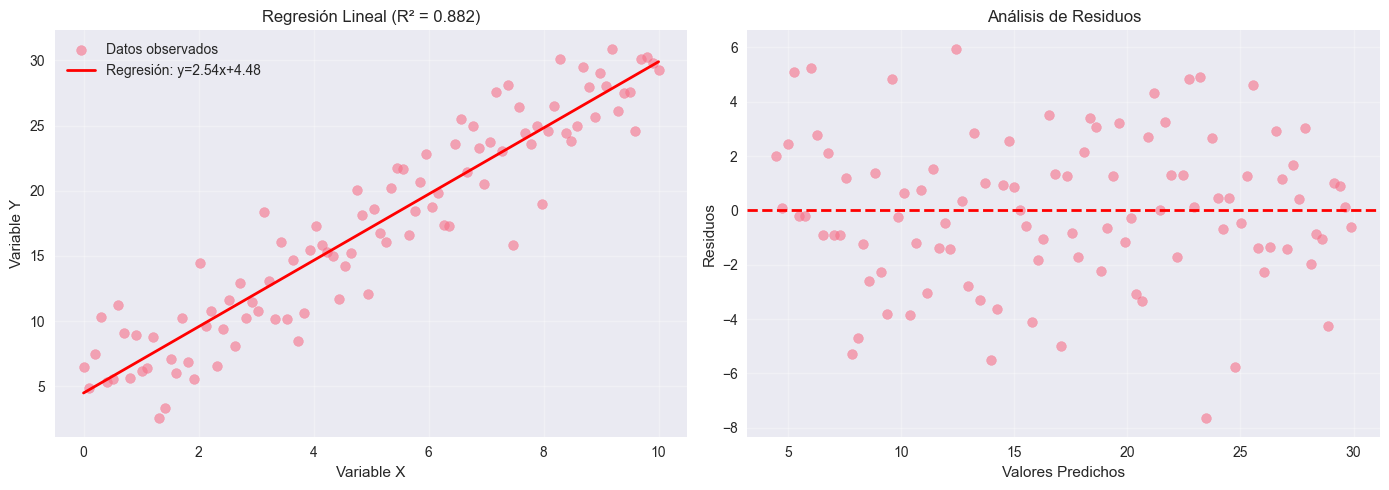

In [9]:
# Generar datos con relación lineal
np.random.seed(42)
x = np.linspace(0, 10, 100)
y = 2.5 * x + 5 + np.random.normal(0, 3, 100)  # y = 2.5x + 5 + ruido

# Calcular regresión lineal
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
y_pred = slope * x + intercept

# Coeficiente de correlación de Pearson
correlacion, p_corr = stats.pearsonr(x, y)

print("=" * 50)
print("REGRESIÓN LINEAL Y CORRELACIÓN")
print("=" * 50)
print(f"\nEcuación de la recta: y = {slope:.3f}x + {intercept:.3f}")
print(f"Coeficiente de correlación (r): {correlacion:.3f}")
print(f"Coeficiente de determinación (R²): {r_value**2:.3f}")
print(f"Valor p: {p_value:.4f}")

# Interpretación de R²
print(f"\nInterpretación: El modelo explica el {r_value**2*100:.1f}% de la variabilidad de y")

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de dispersión con línea de regresión
axes[0].scatter(x, y, alpha=0.6, s=50, label='Datos observados')
axes[0].plot(x, y_pred, 'r-', linewidth=2, label=f'Regresión: y={slope:.2f}x+{intercept:.2f}')
axes[0].set_xlabel('Variable X')
axes[0].set_ylabel('Variable Y')
axes[0].set_title(f'Regresión Lineal (R² = {r_value**2:.3f})')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Residuos
residuos = y - y_pred
axes[1].scatter(y_pred, residuos, alpha=0.6, s=50)
axes[1].axhline(0, color='red', linestyle='--', linewidth=2)
axes[1].set_xlabel('Valores Predichos')
axes[1].set_ylabel('Residuos')
axes[1].set_title('Análisis de Residuos')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Matriz de Correlación:
            Variable_1  Variable_2  Variable_3  Variable_4  Variable_5
Variable_1       1.000      -0.136       0.191       0.896      -0.098
Variable_2      -0.136       1.000      -0.037      -0.141       0.577
Variable_3       0.191      -0.037       1.000       0.185       0.261
Variable_4       0.896      -0.141       0.185       1.000      -0.023
Variable_5      -0.098       0.577       0.261      -0.023       1.000


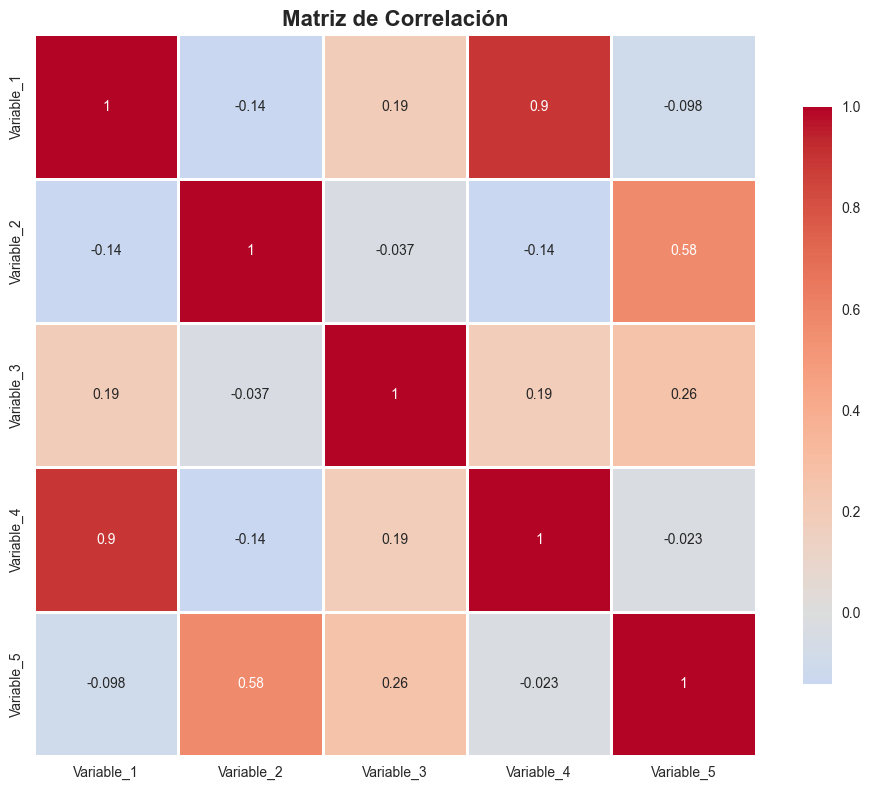

In [10]:
# Matriz de correlación con múltiples variables
np.random.seed(42)
df = pd.DataFrame({
    'Variable_1': np.random.normal(100, 15, 100),
    'Variable_2': np.random.normal(50, 10, 100),
    'Variable_3': np.random.normal(75, 12, 100)
})

# Crear correlaciones artificiales
df['Variable_4'] = df['Variable_1'] * 0.7 + np.random.normal(0, 5, 100)
df['Variable_5'] = df['Variable_2'] * 0.5 + df['Variable_3'] * 0.3 + np.random.normal(0, 8, 100)

# Calcular matriz de correlación
matriz_correlacion = df.corr()

print("\nMatriz de Correlación:")
print(matriz_correlacion.round(3))

# Visualizar matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## Ejercicio Práctico Integrador


**Objetivo del ejercicio**: Al completarlo, habrás realizado un análisis estadístico completo similar a lo que harías en un proyecto real de análisis de datos.

Este ejercicio integrador combina **todos los conceptos estadísticos** aprendidos en este notebook en un análisis completo de un caso de negocio realista: el análisis de ventas mensuales de una empresa.

Este flujo de trabajo representa un **análisis profesional típico**: empezar explorando los datos, identificar patrones, validar supuestos, y visualizar resultados.

### ¿Para qué sirve?

   - Q-Q plot para evaluar normalidad

Este tipo de análisis integral es lo que harás diariamente como analista de datos:   

   - Box plot para identificar outliers

   - Histograma para ver distribución

- **Análisis exploratorio completo**: entender los datos desde múltiples ángulos   

   - Serie temporal para ver evolución

- **Identificar tendencias**: ¿las ventas están creciendo, estables o cayendo?

- **Visualizaciones múltiples**: 

- **Evaluar variabilidad**: ¿qué tan predecibles son las ventas?

- **Prueba de normalidad**: verificar si los datos siguen una distribución normal (importante para otros análisis)

- **Validar supuestos**: ¿los datos se comportan como esperamos?

- **Regresión lineal**: identificar la tendencia de crecimiento (o decrecimiento)

- **Comunicar hallazgos**: presentar resultados de forma visual y comprensible 

- **Estadística descriptiva**: calcular media, mediana, desviación estándar, coeficiente de variación



En este ejercicio aplicaremos:

ANÁLISIS ESTADÍSTICO COMPLETO - VENTAS MENSUALES

1. ESTADÍSTICA DESCRIPTIVA
------------------------------------------------------------
Media: $1560.24
Mediana: $1503.84
Desviación Estándar: $326.10
Coeficiente de Variación: 20.90%

2. ANÁLISIS DE TENDENCIA
------------------------------------------------------------
Tendencia: $44.37 por mes
R²: 0.926
Crecimiento mensual: 2.84%

3. PRUEBA DE NORMALIDAD (Shapiro-Wilk)
------------------------------------------------------------
Estadístico: 0.9622
Valor p: 0.4852
✓ Los datos siguen una distribución normal


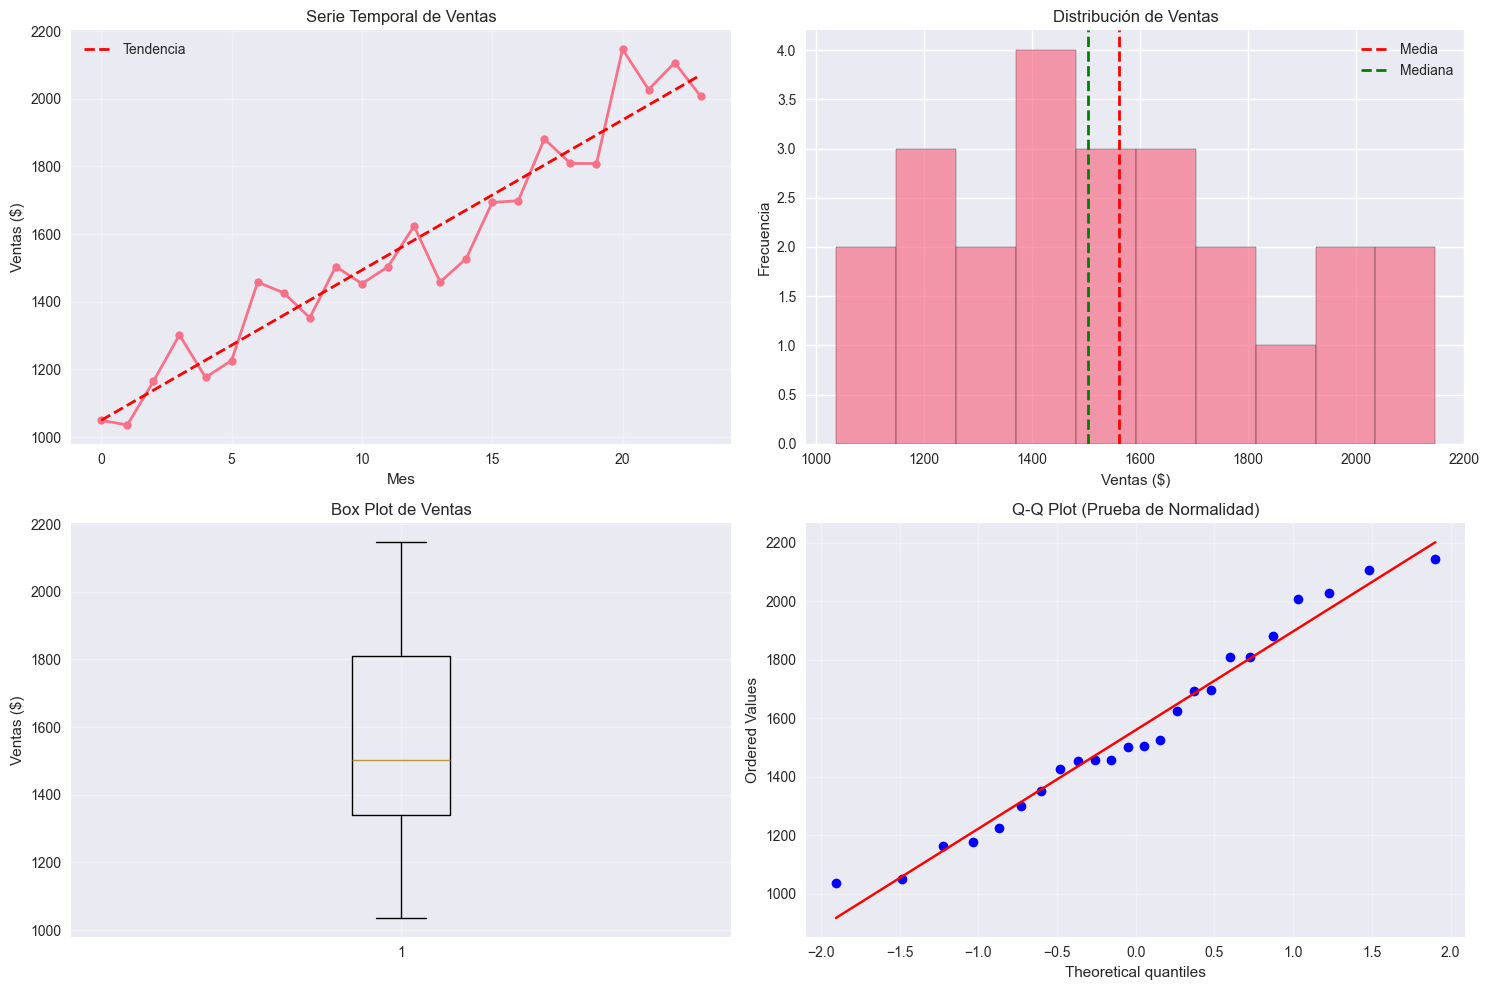


ANÁLISIS COMPLETADO


In [11]:
# Crear dataset de ejemplo: ventas mensuales
np.random.seed(42)
meses = 24
ventas = 1000 + np.arange(meses) * 50 + np.random.normal(0, 100, meses)

print("=" * 60)
print("ANÁLISIS ESTADÍSTICO COMPLETO - VENTAS MENSUALES")
print("=" * 60)

# 1. Estadística descriptiva
print("\n1. ESTADÍSTICA DESCRIPTIVA")
print("-" * 60)
print(f"Media: ${np.mean(ventas):.2f}")
print(f"Mediana: ${np.median(ventas):.2f}")
print(f"Desviación Estándar: ${np.std(ventas, ddof=1):.2f}")
print(f"Coeficiente de Variación: {(np.std(ventas, ddof=1)/np.mean(ventas))*100:.2f}%")

# 2. Análisis de tendencia (regresión)
tiempo = np.arange(meses)
slope, intercept, r_value, p_value, std_err = stats.linregress(tiempo, ventas)

print("\n2. ANÁLISIS DE TENDENCIA")
print("-" * 60)
print(f"Tendencia: ${slope:.2f} por mes")
print(f"R²: {r_value**2:.3f}")
print(f"Crecimiento mensual: {(slope/np.mean(ventas))*100:.2f}%")

# 3. Prueba de normalidad
stat, p_normal = stats.shapiro(ventas)
print("\n3. PRUEBA DE NORMALIDAD (Shapiro-Wilk)")
print("-" * 60)
print(f"Estadístico: {stat:.4f}")
print(f"Valor p: {p_normal:.4f}")
if p_normal > 0.05:
    print("✓ Los datos siguen una distribución normal")
else:
    print("✗ Los datos NO siguen una distribución normal")

# Visualización completa
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Serie temporal
axes[0, 0].plot(tiempo, ventas, 'o-', linewidth=2, markersize=6)
axes[0, 0].plot(tiempo, slope * tiempo + intercept, 'r--', linewidth=2, label='Tendencia')
axes[0, 0].set_xlabel('Mes')
axes[0, 0].set_ylabel('Ventas ($)')
axes[0, 0].set_title('Serie Temporal de Ventas')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Histograma
axes[0, 1].hist(ventas, bins=10, edgecolor='black', alpha=0.7)
axes[0, 1].axvline(np.mean(ventas), color='red', linestyle='--', linewidth=2, label='Media')
axes[0, 1].axvline(np.median(ventas), color='green', linestyle='--', linewidth=2, label='Mediana')
axes[0, 1].set_xlabel('Ventas ($)')
axes[0, 1].set_ylabel('Frecuencia')
axes[0, 1].set_title('Distribución de Ventas')
axes[0, 1].legend()

# Box plot
axes[1, 0].boxplot(ventas)
axes[1, 0].set_ylabel('Ventas ($)')
axes[1, 0].set_title('Box Plot de Ventas')
axes[1, 0].grid(True, alpha=0.3)

# Q-Q plot para normalidad
stats.probplot(ventas, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot (Prueba de Normalidad)')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("ANÁLISIS COMPLETADO")
print("=" * 60)